In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [2]:
data = pd.read_csv("/kaggle/input/dataset/processed_dataset.csv")

In [3]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           915 non-null    object 
 1   Open                           915 non-null    float64
 2   High                           915 non-null    float64
 3   Low                            915 non-null    float64
 4   Close                          915 non-null    float64
 5   Change                         915 non-null    float64
 6   Amplitude                      915 non-null    float64
 7   MA(7)                          915 non-null    float64
 8   MA(25)                         915 non-null    float64
 9   MA(99)                         915 non-null    float64
 10  Vol(USDT)                      915 non-null    float64
 11  RSI                            915 non-null    float64
 12  Ensemble_Sentiment             915 non-null    flo

In [4]:
# Define the features (independent variables) and the target (dependent variable)
X = data[['Open', 'High', 'Low', 'Close_lag_7', 'Close_lag_14',
                'Close_rolling_7', 'Close_rolling_14', 'MA(7)', 'MA(25)', 'MA(99)',
                'RSI', 'Vol(USDT)', 'Ensemble_Sentiment', 'Sentiment_7day_MA',
                'Sentiment_Change', 'Sentiment_Volatility']]
y = data['Close']

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the RandomForestRegressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with the RandomForestRegressor and parameter grid
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print(f'Best parameters: {grid_search.best_params_}')

# Use the best model found by grid search
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [8]:
# Make predictions with the best model on the testing data
best_predictions = best_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the best model's predictions
best_mse = mean_squared_error(y_test, best_predictions)
print(f'Mean Squared Error of the best model: {best_mse}')

# Calculate Mean Absolute Percentage Error (MAPE) for the best model's predictions
mape = mean_absolute_percentage_error(y_test, best_predictions)
print(f'MAPE: {mape}')

# Calculate R² score for the best model's predictions
r2 = r2_score(y_test, best_predictions)
print(f'R²: {r2}')

Mean Squared Error of the best model: 0.00012729929612537735
MAPE: 0.12376590981903525
R²: 0.9982901146724187


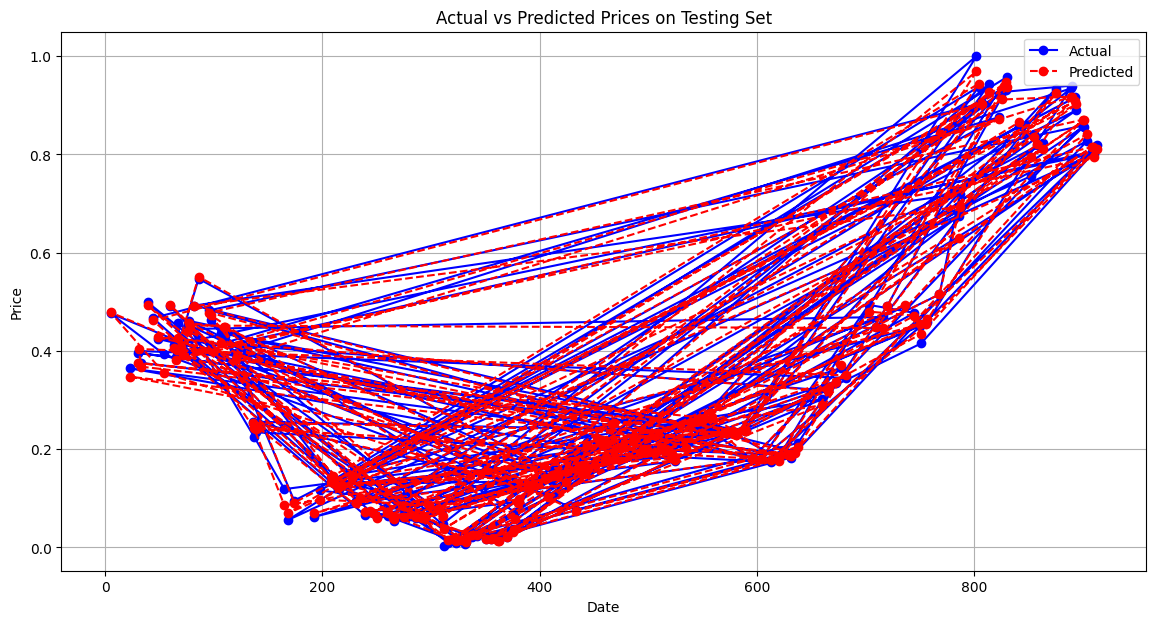

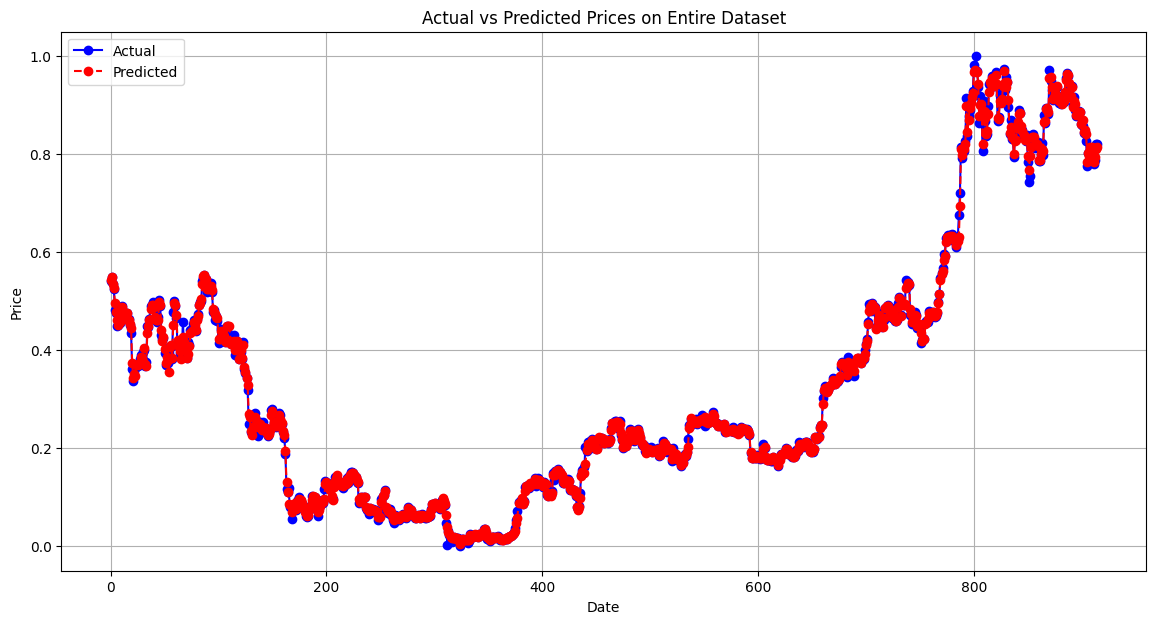

In [9]:
# Create a DataFrame with actual and predicted values for the testing set
results = pd.DataFrame({'Actual': y_test, 'Predicted': best_predictions})

# Add the 'Date' column to the results DataFrame
results['Date'] = X_test.index

# Plot actual vs predicted prices for the testing set
import matplotlib.pyplot as plt
import pandas as pd

results = pd.DataFrame({'Actual': y_test, 'Predicted': best_predictions})

results['Date'] = X_test.index

plt.figure(figsize=(14, 7))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue', marker='o')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red', linestyle='dashed', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices on Testing Set')
plt.legend()
plt.grid(True)
plt.show()

X_train['Actual'] = y_train
X_train['Predicted'] = random_forest_model.predict(X_train[['Open', 'High', 'Low', 'Close_lag_7', 'Close_lag_14',
                'Close_rolling_7', 'Close_rolling_14', 'MA(7)', 'MA(25)', 'MA(99)',
                'RSI', 'Vol(USDT)', 'Ensemble_Sentiment', 'Sentiment_7day_MA',
                'Sentiment_Change', 'Sentiment_Volatility']])
X_test['Actual'] = y_test
X_test['Predicted'] = best_predictions

all_data = pd.concat([X_train, X_test])
all_data.sort_index(inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(all_data.index, all_data['Actual'], label='Actual', color='blue', marker='o')
plt.plot(all_data.index, all_data['Predicted'], label='Predicted', color='red', linestyle='dashed', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices on Entire Dataset')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted')

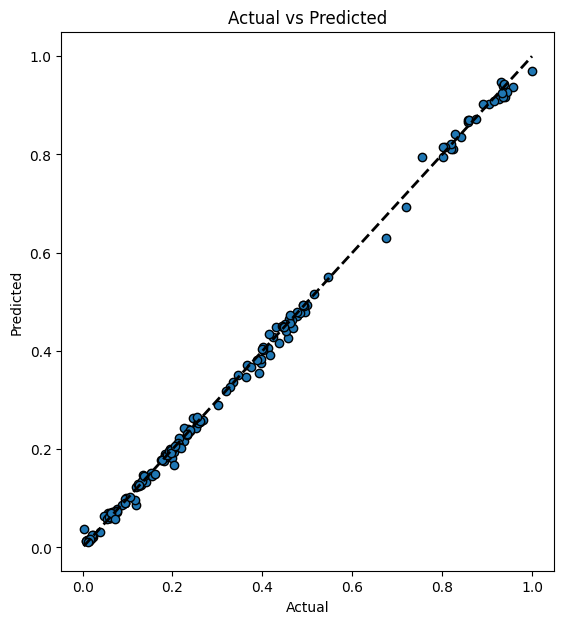

[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   2.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=300; total time=   2.5s
[CV] END max_depth=None, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=300; total time=   2.0s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_d

In [10]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(y_test, best_predictions, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')